# 3. Treinamento da rede

In [1]:
%load_ext autoreload
%autoreload 2

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import h5py
import keras
import k3d
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D
from livelossplot.keras import PlotLossesCallback
from sklearn.metrics import confusion_matrix, f1_score
from ipywidgets import interact, widgets

import src

Using TensorFlow backend.


In [2]:
with h5py.File('../data/processed/stanford6_truncated_rgb.h5', 'r') as dataset:
    x_train = np.array(dataset['train/X'])
    y_train = np.array(dataset['train/Y'])
    x_val = np.array(dataset['val/X'])
    y_val = np.array(dataset['val/Y'])

classnames = {
    0: 'Floodplain',
    1: 'Pointbar',
    2: 'Channel',
    3: 'Boundary',
}    
    
m = x_train.shape[0]
num_classes = 4

In [3]:
input_shape = x_train.shape[1:]

model = Sequential()

model.add(Conv2D(32, (3, 3), padding='same', input_shape=input_shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

model.add(Conv2D(128, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

model.add(Flatten())

model.add(Dense(256))
model.add(Activation('relu'))

model.add(Dense(num_classes))
model.add(Activation('softmax'))

opt = keras.optimizers.rmsprop(lr=0.0001, decay=1e-6)

model.compile(
    loss='categorical_crossentropy',
    optimizer=opt,
    metrics=['accuracy']
)

model.summary()

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
activation_2 (Activat

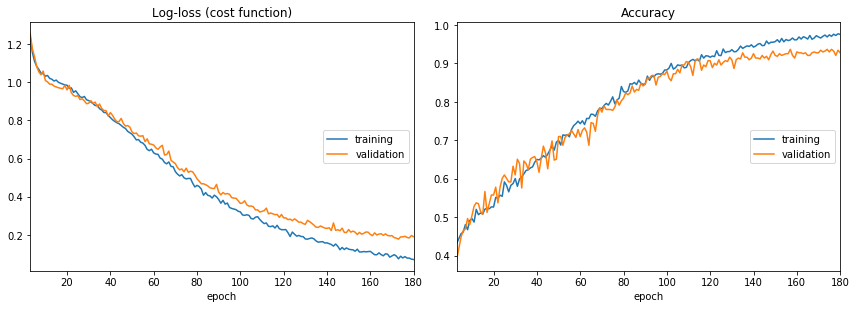

Log-loss (cost function):
training   (min:    0.072, max:    1.381, cur:    0.072)
validation (min:    0.178, max:    1.356, cur:    0.191)

Accuracy:
training   (min:    0.256, max:    0.977, cur:    0.975)
validation (min:    0.361, max:    0.937, cur:    0.927)


In [4]:
batch_size = 32
epochs = 180

history = model.fit(
    x_train, y_train,
    validation_data=(x_val, y_val),
    epochs=epochs,
    shuffle=True,
    callbacks=[PlotLossesCallback()],
)

In [5]:
model.save('../models/trained_model.h5')

[**4. Teste do modelo**](04-model-testing.ipynb)